<img src = 'https://upload.wikimedia.org/wikipedia/commons/5/51/IBM_logo.svg?raw=true' width="240" height="360">
 
# CFC Project  


Project overview:

      The covid-19 having some many variants are now a day. The most part is to take covid-19 vaccine as early as possible. The most important part is that the number vaccine have taken are unknown to city. To overcome the issue building a model to prediction to take to covid-19 vaccine as soon as possible by a person.



### Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Data Preprocessing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [The Model](#section6)<br>
  - 6.1 [Build the Model](#section601)<br>
  - 6.2 [Inspect the Model](#section602)<br>
  - 6.3 [Train the Model](#section603)<br>
  - 6.4 [Make Predictions](#section604)<br>
7. [Model Tuning](#section7)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

   The **covid-19** having some many variants are now a day. The most part is to take covid-19 vaccine as early as possible. The most important part is that the number vaccine have taken are unknown to city. To overcome the issue building a model to prediction to take to covid-19 vaccine as soon as possible by a person.

<a id=section2></a>
## 2. Importing Packages

In [2]:
import numpy as np                     
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## import pandas_profiling

from sklearn import metrics
import numpy as np
                                                                    # Allow plots to appear directly in the notebook
%matplotlib inline                                       
  
# importing alll the necessary packages to use the various classification algorithms

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings("ignore")                   # To suppress all the warnings in the notebook.


Using TensorFlow backend.


<a id=section3></a>
## 3. Loading Data

### Importing Dataset

In [56]:
# Importing the DEFCON dataset using Pandas Dataframe.

Project1= pd.read_csv('C:/Users/BijayaSanjib/Desktop/DATA SCINCE/CFC/Dataset.csv')
Project = Project1.copy()
Project.head()

,Sl. No.,Age Group (18 -44),Age Group (45 - 60+),Male Person,Female Person,First Name,Last Name,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk
0,1,1,0,1,0,Firstname 1,Lastname 1,karnataka,Bengaluru,1,0,1,3
1,2,0,1,0,1,Firstname 2,Lastname 2,Maharashtra,Pune,1,1,3,1
2,3,0,1,1,0,Firstname 3,Lastname 3,Maharashtra,Pune,1,0,1,2
3,4,1,0,1,0,Firstname 4,Lastname 4,Maharashtra,Pune,1,1,2,3
4,5,1,0,1,0,Firstname 5,Lastname 5,Maharashtra,Mumbai,1,1,3,3


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **details** of covide information of vaccine taken or need to take on **Priority**. 


##- Detailed information about each ingredients column can be found at this [link](https://covid19.who.int/).


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
|                                       |
| Age                            | Person's age.                                                                              |
                                                              


In [57]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sl. No.                        15 non-null     int64 
 1   Age Group (18 -44)             15 non-null     int64 
 2   Age Group (45 - 60+)           15 non-null     int64 
 3   Male Person                    15 non-null     int64 
 4   Female Person                  15 non-null     int64 
 5   First Name                     15 non-null     object
 6   Last Name                      15 non-null     object
 7   State                          15 non-null     object
 8   City                           15 non-null     object
 9   Vaccination Dose1              15 non-null     int64 
 10  Vaccination Dose2              15 non-null     int64 
 11  Pre-existing health condition  15 non-null     int64 
 12  Risk                           15 non-null     int64 
dtypes: int6

- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **15 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **1 columns** with a **numeric** datatype.
  - There are **12 columns** with a **object** datatype.
  - There are **0 missing** values in the data.

In [58]:
Project.shape

(15, 13)

In [59]:
# Checking any missing data

Project.isnull () .any()

Sl. No.                          False
Age Group (18 -44)               False
Age Group (45 - 60+)             False
Male Person                      False
Female Person                    False
First Name                       False
Last Name                        False
State                            False
City                             False
Vaccination Dose1                False
Vaccination Dose2                False
Pre-existing health condition    False
Risk                             False
dtype: bool

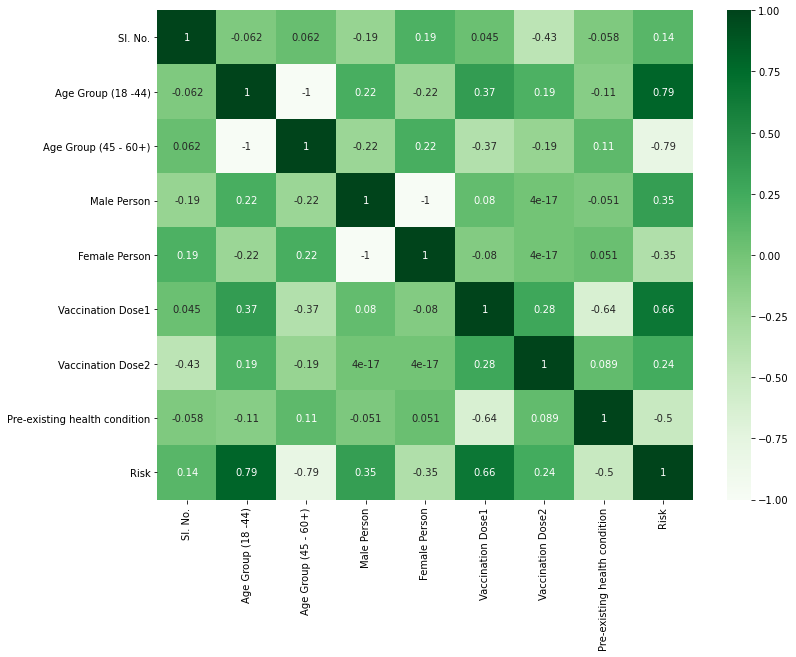

In [60]:
# Heatmap plot with values

correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [32]:
Project.Risk.unique()

array(['Low', 'High', 'Moderate'], dtype=object)

In [61]:
Project.Risk.value_counts()

3    8
2    4
1    3
Name: Risk, dtype: int64

In [54]:
# Risk value assign

Project["Risk"].replace({"High": "1", "Moderate": "2", "Low": "3" }, inplace=True)

In [62]:
# Pre-existing health condition (High BP, co-morbidities, etc..) value assign

# Project["Pre-existing health condition (High BP, co-morbidities, etc..)"].replace({"High Blood Pressure": "1", "Diabetes": "2", "Normal": "4", "Chronic pulmonary disease": "3"  }, inplace=True)

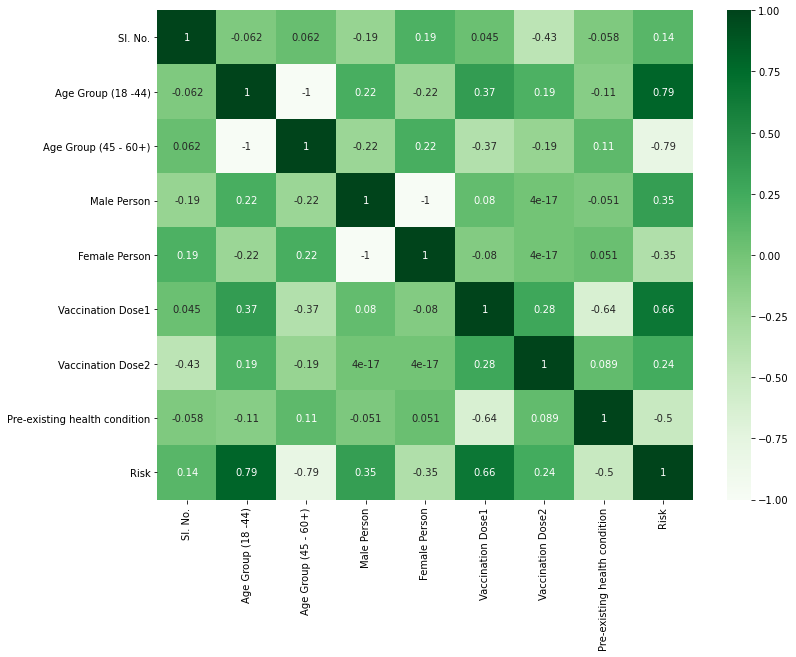

In [63]:
# Heatmap plot with values

correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

In [64]:
# dropping Sl. No. column


Project.drop('Sl. No.', axis= 1, inplace=True)   ## Putting inplace=False 

In [65]:
Project1 = Project.copy()

In [66]:
print(Project1)

    Age Group (18 -44)  Age Group (45 - 60+)  Male Person  Female Person  \
0                    1                     0            1              0   
1                    0                     1            0              1   
2                    0                     1            1              0   
3                    1                     0            1              0   
4                    1                     0            1              0   
5                    1                     0            0              1   
6                    0                     1            1              0   
7                    0                     1            0              1   
8                    0                     1            1              0   
9                    0                     1            1              0   
10                   1                     0            0              1   
11                   0                     1            0              1   
12          

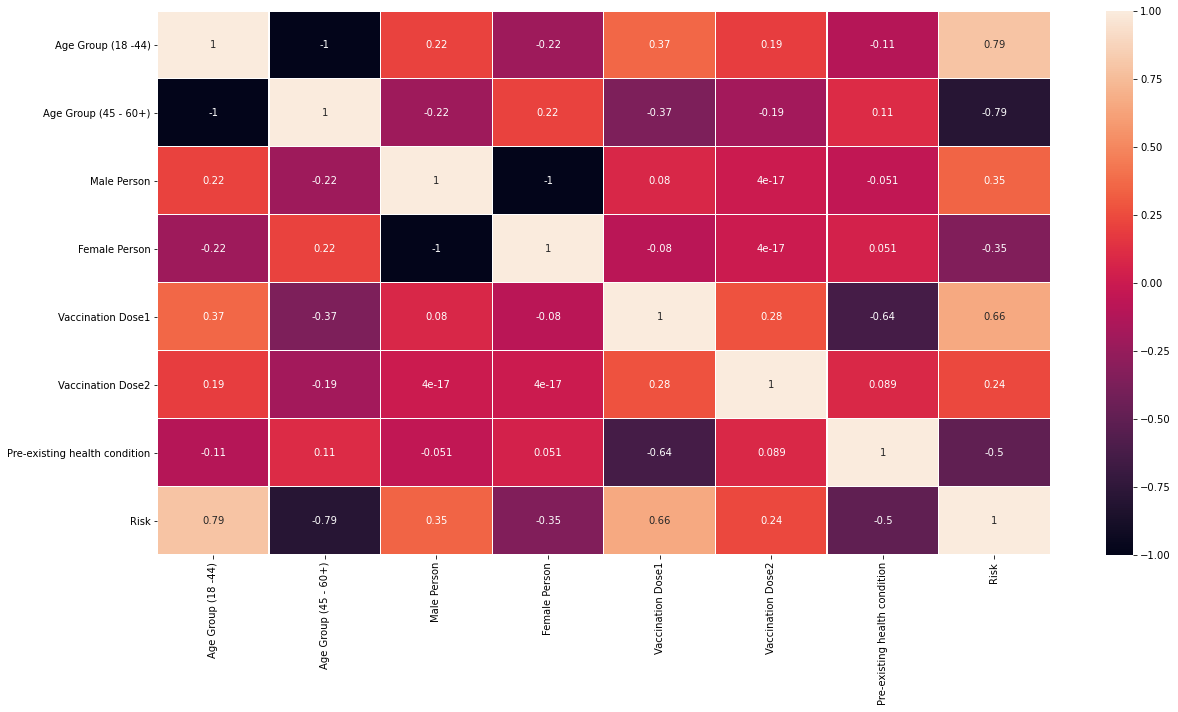

In [67]:
# Correlation heatmap for dataset

sns.heatmap(Project1.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()